### Import dependencies:

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

### find_bbox function:
Takes a mask image as input and returns related bouding box coordinates.

In [2]:
def find_bbox(img, margin):
    im_width, im_height = img.shape
    row_indices = np.nonzero(img == 255)
    ymin, xmin = np.min(row_indices, axis=1)
    ymax, xmax = np.max(row_indices, axis=1)
    
    xmin = xmin-margin if(xmin-margin>0) else xmin
    ymin = ymin-margin if(ymin-margin>0) else ymin
    xmax = xmax+margin if(xmax+margin>im_height) else xmax
    ymax = ymax+margin if(ymax+margin>im_width) else ymax
    return (xmin, ymin, xmax, ymax)

### Main body:

In [3]:
train_mask_path = "inputs/train_masks/{}_mask.gif"
df_train = pd.read_csv('inputs/train_masks.csv')
ids_train = df_train['img'].map(lambda s: s.split('.')[0])

num = 1
margin = 10
bboxes = []
for id in ids_train:
    img_path = train_mask_path.format(id)
    img_origin = np.array(Image.open(img_path).convert('L'))
    xmin, ymin, xmax, ymax = find_bbox(img_origin, margin)
    
    bboxes.append([id, xmin, ymin, xmax, ymax])
    
    if num%500 == 0:
        print '{0}/{1}'.format(num, len(ids_train))
    num += 1
    
np.savetxt('inputs/train_bbox.csv', bboxes, fmt='%s', delimiter=',', newline='\n')

500/5088
1000/5088
1500/5088
2000/5088
2500/5088
3000/5088
3500/5088
4000/5088
4500/5088
5000/5088


In [4]:
### Provide a integer number for id_image & see related bounding box. 

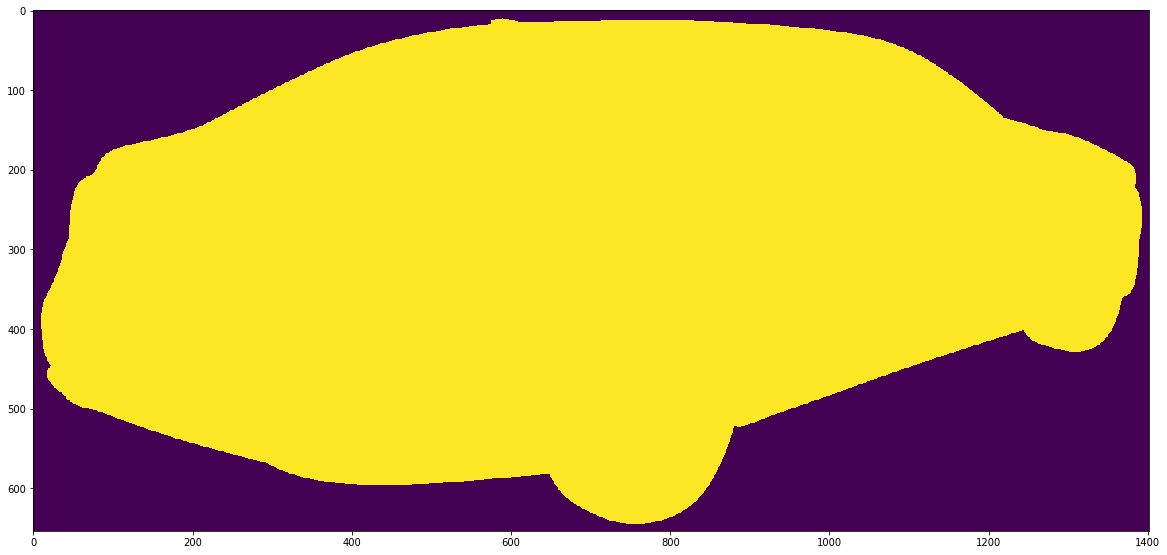

In [9]:
id_img = 10
plt.figure(figsize=(20, 20))
im = np.array(Image.open(train_mask_path.format(ids_train[id_img])).convert('L'))
plt.imshow(im)
xmin, ymin, xmax, ymax = find_bbox(im)
margin = 10
xmin -= margin
ymin -= margin
xmax += margin
ymax += margin
cropped_im = im[ymin:ymax, xmin:xmax]
plt.imshow(cropped_im)
#rect = plt.Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
#plt.axes().add_patch(rect)
#plt.show()